In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
#붓꽃 데이터 로드
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
from sklearn.preprocessing import LabelEncoder
df['species'] = LabelEncoder().fit_transform(df['species'])  #species를 0,1,2로 인코딩
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


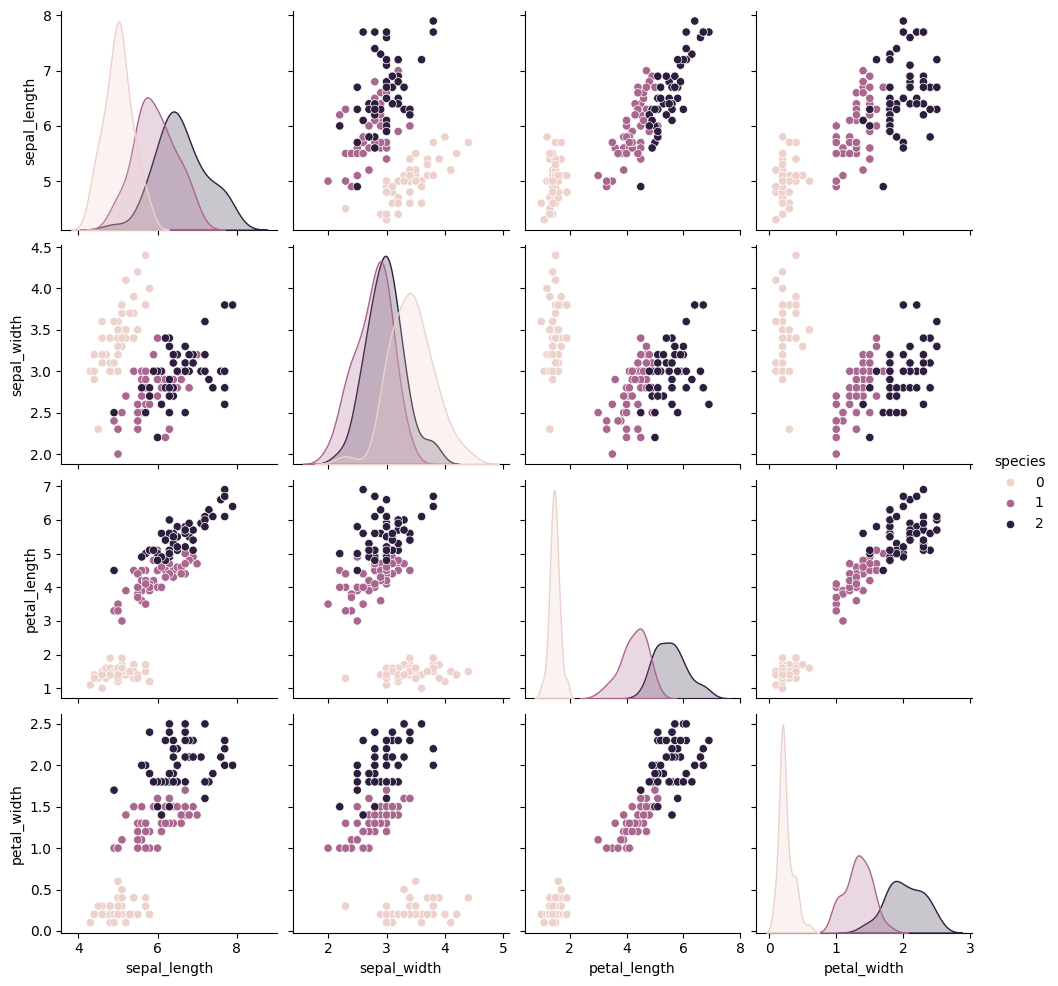

In [ ]:
import seaborn as sns
sns.pairplot(df, hue='species')

In [ ]:
df_copy=df.copy()

In [ ]:
cluster1=KMeans(n_clusters=3, n_init=10, max_iter=500, random_state=42, algorithm='elkan')
cluster1.fit(df_copy)

KMeans(algorithm='elkan', max_iter=500, n_clusters=3, n_init=10,
       random_state=42)

In [ ]:
cluster_center=cluster1.cluster_centers_  #각 군집의 중심점 결과 저장
cluster_prediction=cluster1.predict(df_copy)  #각 예측군집 결과 저장

print(pd.DataFrame(cluster_center))
print(pd.DataFrame(cluster_prediction))
print(df['species'].ravel()) #정답데이터출력

          0         1         2         3         4
0  6.622449  2.983673  5.573469  2.032653  2.000000
1  5.006000  3.428000  1.462000  0.246000  0.000000
2  5.915686  2.764706  4.264706  1.333333  1.019608
     0
0    1
1    1
2    1
3    1
4    1
..  ..
145  0
146  0
147  0
148  0
149  0

[150 rows x 1 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<ipython-input-16-7e26e3b0fd96>:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  print(df['species'].ravel())


In [ ]:
#K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, random_state=42)
df_copy["cluster"] = kmeans.fit_predict(df.drop(columns=["species"]))  # species 제외하고 클러스터링

In [ ]:
print(df_copy["cluster"].ravel())  # K-Means 클러스터링 결과 출력
print(df["species"].ravel())   # 실제 붓꽃의 정답 라벨 출력
aa = df_copy["cluster"].replace([0, 1, 2], ['a', 'b', 'c'])
aa = aa.replace(['a', 'b', 'c'], [2, 0, 1])
print(aa.ravel())

df_copy["cluster"] = aa

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


<ipython-input-28-512b4b087489>:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  print(df_copy["cluster"].ravel())  # 클러스터링 결과 출력
<ipython-input-28-512b4b087489>:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  print(df["species"].ravel())  # 정답 데이터 출력
<ipython-input-28-512b4b087489>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  aa = aa.replace(['a', 'b', 'c'], [2, 0, 1])
<ipython-input-28-512b4b087489>:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `t

In [ ]:
df_copy['cluster']=cluster_prediction
df_copy.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


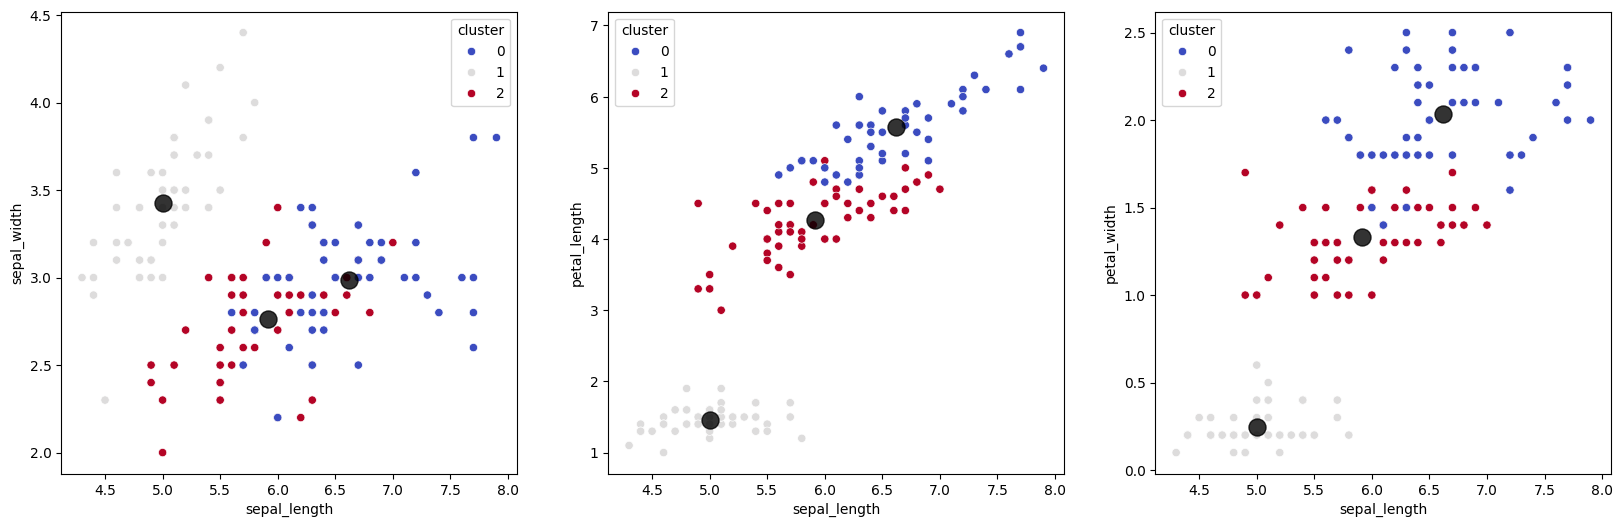

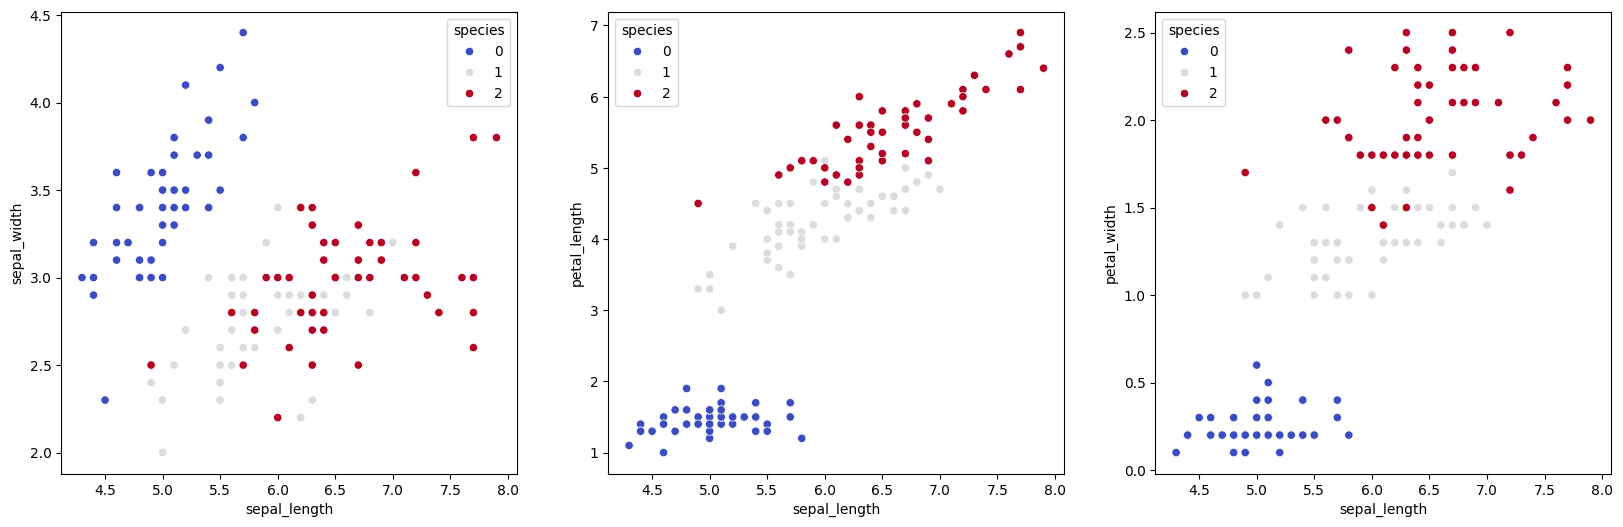

In [ ]:
# 시각화하기
from matplotlib import pyplot as plt  # 그래프 시각화

# 군집화 결과
plt.figure(figsize=(20, 6))
X = df_copy

plt.subplot(131)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], data=X, hue="cluster", palette="coolwarm")
plt.scatter(cluster_center[:, 0], cluster_center[:, 1], c='black', alpha=0.8, s=150)

plt.subplot(132)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 2], data=X, hue="cluster", palette="coolwarm")
plt.scatter(cluster_center[:, 0], cluster_center[:, 2], c='black', alpha=0.8, s=150)

plt.subplot(133)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 3], data=X, hue="cluster", palette="coolwarm")
plt.scatter(cluster_center[:, 0], cluster_center[:, 3], c='black', alpha=0.8, s=150)

plt.show()

# species 시각화(원본)
plt.figure(figsize=(20, 6))

plt.subplot(131)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], data=X, hue="species", palette='coolwarm')

plt.subplot(132)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 2], data=X, hue="species", palette='coolwarm')

plt.subplot(133)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 3], data=X, hue="species", palette='coolwarm')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

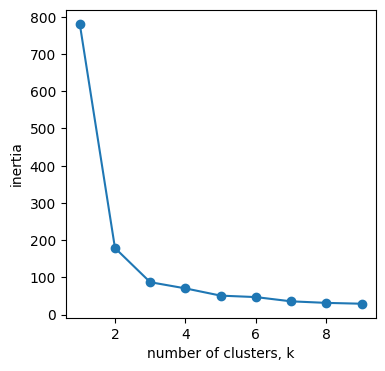

In [ ]:
# 비지도 학습인 K-means는 실제 정답이 없으므로 일반적인 성능 평가 대신 적절한 K개를 설정하였는지 평가할 수 있음(elbow 기법)
# inertia는 각 군집별 오차의 제곱의 합으로 군집 내 분산으로 정의. inertia를 이용하여 최적의 k를 찾을 수 있음
# inertia는 k가 증가하게 되면 샘플에 할당된 centroid(중심점)에 근접하므로 inertia가 감소하게 됨

# 적절한 K에 대해 붓꽃 데이터프레임을 넣어 K와 inertia를 비교
# 값(3)에 적합한 변화를 시점임을 알 수 있음

scope = range(1, 10)
inertias = []

for k in scope:
    model = KMeans(n_clusters=k)
    model.fit(df)
    inertias.append(model.inertia_)

# K 개수와 inertia 비교 시각화
plt.figure(figsize=(4, 4))
plt.plot(scope, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show